In [ ]:
🟦 Cell 1: Project Title & Introduction

In [49]:
# ---------------------------------------------------------------
# 🍫✨ ChocoCrunch Analytics: Sweet Stats & Sour Truths
# ---------------------------------------------------------------
# Domain: Nutrition Analytics / Food Tech / Public Health
# Objective: Analyze chocolate nutritional profiles from OpenFoodFacts API
# ---------------------------------------------------------------

print("📊 Starting ChocoCrunch Analytics Project — Let's sweeten the data! 🍫✨")


📊 Starting ChocoCrunch Analytics Project — Let's sweeten the data! 🍫✨


In [5]:
# ---------------------------------------------------------------
# 📚 Import Required Libraries
# ---------------------------------------------------------------
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


🟦 Cell 3: Data Extraction (API)



In [51]:
# ---------------------------------------------------------------
# 📥 Step 1: Extract Chocolate Data via OpenFoodFacts API
# ---------------------------------------------------------------

In [6]:
import requests

# Base URL (we'll update the page number in the loop)
base_url = "https://world.openfoodfacts.org/api/v2/search"
params = {
    "categories": "chocolates",
    "fields": "code,product_name,brands,nutriments",
    "page_size": 100
}

all_products = []
total_pages = 120  # 12,000 products / 100 per page

for page in range(1, total_pages + 1):
    params["page"] = page
    response = requests.get(base_url, params=params)
    data = response.json()
    
    products = data.get("products", [])
    all_products.extend(products)
    
    print(f"Fetched page {page} ({len(products)} products)")
    
    if not products:
        print("No more products found — stopping early.")
        break

    print(f"Fetched page {page} ({len(products)} records). Total so far: {len(all_products)}")
    
    time.sleep(0.5)  # be polite to the API

    print(f"\n✅ Total products fetched: {len(all_products)}")



Fetched page 1 (100 products)
Fetched page 1 (100 records). Total so far: 100

✅ Total products fetched: 100
Fetched page 2 (100 products)
Fetched page 2 (100 records). Total so far: 200

✅ Total products fetched: 200
Fetched page 3 (100 products)
Fetched page 3 (100 records). Total so far: 300

✅ Total products fetched: 300
Fetched page 4 (100 products)
Fetched page 4 (100 records). Total so far: 400

✅ Total products fetched: 400
Fetched page 5 (100 products)
Fetched page 5 (100 records). Total so far: 500

✅ Total products fetched: 500
Fetched page 6 (100 products)
Fetched page 6 (100 records). Total so far: 600

✅ Total products fetched: 600
Fetched page 7 (100 products)
Fetched page 7 (100 records). Total so far: 700

✅ Total products fetched: 700
Fetched page 8 (100 products)
Fetched page 8 (100 records). Total so far: 800

✅ Total products fetched: 800
Fetched page 9 (100 products)
Fetched page 9 (100 records). Total so far: 900

✅ Total products fetched: 900
Fetched page 10 (10

In [3]:
import requests
import pandas as pd
import time


🧩 Step 2: Extract desired columns

We’ll convert to a DataFrame and select only the needed fields.

In [7]:
# Convert to DataFrame
df = pd.DataFrame(all_products)


# Rename and select only relevant columns
df = df.rename(columns={
    "code": "product_code",
    "product_name": "product_name",
    "brands": "brand",
    "nutriments": "nutriments"
})[["product_code", "product_name", "brand", "nutriments"]]

print("📋 Data sample:")
print(df.head())
print(f"\nShape: {df.shape}")

📋 Data sample:
    product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                  brand  \
0                                maroc.   
1                                 perly   
2                              sidi ali   
3  Les Eaux Minérales d'oulmès,Sidi Ali   
4                              AQUAFINA   

                                          nutriments  
0  {'carbohydrates': 42, 'carbohydrates_100g': 4....  
1  {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...  
2  {'chloride': 0.014, 'chloride_100g': 0.014, 'c...  
3  {'fruits-vegetables-legumes-estimate-from-ingr...  
4  {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...  

Shape: (11997, 4)


🟦 Cell 4: Data Cleaning


🧹 Step 3: Data Exploration & Cleaning

 Check missing values





In [ ]:
print("\n🔍 Missing values per column:")
print(df.isnull().sum())


 Handle missing values

In [17]:
#Drop rows where product_code is missing — it's a key identifier
df = df.dropna(subset=["product_code"])

# Replace missing product names or brands with "Unknown"
df["product_name"] = df["product_name"].fillna("Unknown")
df["brand"] = df["brand"].fillna("Unknown")

# Check nutriments field — may contain nested dicts or NaNs
missing_nutriments = df["nutriments"].isnull().sum()
print(f"\n❗ Missing nutriments: {missing_nutriments}")


❗ Missing nutriments: 0


In [18]:
 #Expand nested nutriments dicts into columns
nutrients_df = pd.json_normalize(df["nutriments"])

# Combine back into main DataFrame
df = pd.concat([df.drop(columns=["nutriments"]), nutrients_df], axis=1)

print("\n✅ Expanded DataFrame:")
print(df.head())
print(f"\nNew shape: {df.shape}")


✅ Expanded DataFrame:
    product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   

                                  brand  carbohydrates  carbohydrates_100g  \
0                                maroc.           42.0                 4.2   
1                                 perly            9.4                 9.4   
2                              sidi ali            NaN                 NaN   
3  Les Eaux Minérales d'oulmès,Sidi Ali            NaN                 NaN   
4                              AQUAFINA            0.0                 0.0   

   carbohydrates_serving carbohydrates_unit  carbohydrates_value  energy  \
0                   42.0                  g                 42.0    20.0   
1                    9.4                  g                  9.4   406.0   
2              

In [19]:
# Drop columns with more than 50% nulls
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill numeric columns' missing values with 0
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

print("\n✅ Cleaned dataset info:")
print(df.info())



✅ Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 67 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   product_code                                                 12000 non-null  object 
 1   product_name                                                 12000 non-null  object 
 2   brand                                                        12000 non-null  object 
 3   carbohydrates                                                12000 non-null  float64
 4   carbohydrates_100g                                           12000 non-null  float64
 5   carbohydrates_serving                                        12000 non-null  float64
 6   carbohydrates_unit                                           11205 non-null  object 
 7   carbohydrates_value                                

Save the Cleaned Data


In [20]:
df.to_csv("cleaned_chocolates.csv", index=False)
print("💾 Saved cleaned dataset to 'cleaned_chocolates.csv'")

💾 Saved cleaned dataset to 'cleaned_chocolates.csv'


In [ ]:
🟦 Cell 5: Feature Engineering

# ---------------------------------------------------------------
# 🧪 Step 3: Feature Engineering
# ---------------------------------------------------------------

The required nutrient columns

In [21]:
import numpy as np
import pandas as pd

# --- 1️⃣ Define a helper function to get the correct column ---
def get_col(df, preferred, fallback):
    """
    Return preferred column if exists, else fallback, else None
    """
    if preferred in df.columns:
        return preferred
    elif fallback in df.columns:
        return fallback
    else:
        return None

# --- 2️⃣ Map nutrient columns to standardized names ---
cols = {
    "energy_kcal": get_col(df, "energy-kcal_value", "energy-kcal_100g"),
    "energy_kj": get_col(df, "energy-kj_value", "energy-kj_100g"),
    "carbohydrates": get_col(df, "carbohydrates_value", "carbohydrates_100g"),
    "sugars": get_col(df, "sugars_value", "sugars_100g"),
    "fat": get_col(df, "fat_value", "fat_100g"),
    "saturated_fat": get_col(df, "saturated-fat_value", "saturated-fat_100g"),
    "proteins": get_col(df, "proteins_value", "proteins_100g"),
    "fiber": get_col(df, "fiber_value", "fiber_100g"),
    "salt": get_col(df, "salt_value", "salt_100g"),
    "sodium": get_col(df, "sodium_value", "sodium_100g"),
    "nova": get_col(df, "nova-group", "nova-group"),
    "nutrition_score": get_col(df, "nutrition-score-fr", "nutrition-score-fr"),
    "fruits_vegetables_nuts": get_col(df,
                                      "fruits-vegetables-nuts-estimate-from-ingredients_100g",
                                      "fruits-vegetables-nuts-estimate-from-ingredients_100g")
}



In [22]:
# --- 3️⃣ Derived Features ---

# Sugar to Carb ratio
if cols["sugars"] and cols["carbohydrates"]:
    df["sugar_to_carb_ratio"] = df[cols["sugars"]] / df[cols["carbohydrates"]]
else:
    df["sugar_to_carb_ratio"] = np.nan







In [24]:
 #Calorie Category (per 100g)
if cols["energy_kcal"]:
    df["calorie_category"] = pd.cut(
        df[cols["energy_kcal"]],
        bins=[-np.inf, 100, 250, np.inf],
        labels=["Low", "Moderate", "High"]
    )

In [25]:
# Sugar Category (per 100g)
if cols["sugars"]:
    df["sugar_category"] = pd.cut(
        df[cols["sugars"]],
        bins=[-np.inf, 5, 15, np.inf],
        labels=["Low Sugar", "Moderate Sugar", "High Sugar"]
    )


In [26]:
# Ultra-processed flag
if cols["nova"]:
    df["is_ultra_processed"] = np.where(df[cols["nova"]] == 4, "Yes", "No")


In [27]:
# --- 4️⃣ Verify results ---
print(df[["sugar_to_carb_ratio", "calorie_category", "sugar_category", "is_ultra_processed"]].head())


   sugar_to_carb_ratio calorie_category  sugar_category is_ultra_processed
0             0.333333              Low  Moderate Sugar                 No
1             0.000000              Low       Low Sugar                 No
2                  NaN              Low       Low Sugar                 No
3                  NaN              Low       Low Sugar                 No
4                  NaN              Low       Low Sugar                 No


Verify your new features

In [28]:
print("\n📊 Feature-Engineered Dataset Preview:")
print(df[["product_name", "energy-kcal_value", "sugars_value", 
          "sugar_to_carb_ratio", "calorie_category", 
          "sugar_category", "is_ultra_processed"]].head())

print("\n🔎 New columns added:")
print([col for col in df.columns if col in ["sugar_to_carb_ratio", "calorie_category", "sugar_category", "is_ultra_processed"]])



📊 Feature-Engineered Dataset Preview:
             product_name  energy-kcal_value  sugars_value  \
0                Sidi Ali                0.0          14.0   
1                   perly               97.0           0.0   
2                Sidi Ali                0.0           0.0   
3  Eau minérale naturelle                0.0           0.0   
4                اكوافينا                0.0           0.0   

   sugar_to_carb_ratio calorie_category  sugar_category is_ultra_processed  
0             0.333333              Low  Moderate Sugar                 No  
1             0.000000              Low       Low Sugar                 No  
2                  NaN              Low       Low Sugar                 No  
3                  NaN              Low       Low Sugar                 No  
4                  NaN              Low       Low Sugar                 No  

🔎 New columns added:
['sugar_to_carb_ratio', 'calorie_category', 'sugar_category', 'is_ultra_processed']


Handle remaining NaNs
we can fill or drop missing values if needed:

In [29]:
df["sugar_to_carb_ratio"] = df["sugar_to_carb_ratio"].fillna(0)
df["is_ultra_processed"] = df["is_ultra_processed"].fillna("Unknown")


Save the engineered dataset

In [32]:
df.to_csv("chocolates_feature_engineered.csv", index=False)
print("✅ Saved 'chocolates_feature_engineered.csv' with engineered features.")


✅ Saved 'chocolates_feature_engineered.csv' with engineered features.


In [ ]:

🟦 Cell 6: Exploratory Data Analysis (EDA)



# ---------------------------------------------------------------
# 📊 Step 4: Exploratory Data Analysis (EDA)
# ---------------------------------------------------------------


In [38]:
# --- 📦 Imports for EDA ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
try:
    df
except NameError:
    df = pd.read_csv("chocolates_feature_engineered.csv")
    print("✅ Loaded dataset from 'chocolates_feature_engineered.csv'")

In [40]:
# --- 🎨 Chocolate Theme Setup ---
sns.set(style="whitegrid", palette="deep")
plt.rcParams.update({
    "axes.facecolor": "#fffaf0",  # light creamy background
    "figure.facecolor": "#fffaf0",
    "axes.edgecolor": "#5a3d2b",
    "axes.labelcolor": "#3e2723",
    "text.color": "#3e2723",
    "xtick.color": "#3e2723",
    "ytick.color": "#3e2723",
    "grid.color": "#d7ccc8",
    "figure.figsize": (8,5),
    "axes.titleweight": "bold"
})

choco_brown = "#5a3d2b"
milk_choco = "#a97142"
dark_choco = "#3e2723"
cream = "#f8f1e7"

print("✅ Step 3: EDA started — themed visualizations loaded.")

✅ Step 3: EDA started — themed visualizations loaded.


# --------------------------------------------
# 🔍 1️⃣ Dataset Overview
# --------------------------------------------

In [41]:

print("\n📊 Dataset Info:")
print(df.info())

print("\n🔍 Missing Values per Column:")
print(df.isnull().sum())

print("\n📏 Dataset Shape:", df.shape)




📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 71 columns):
 #   Column                                                       Non-Null Count  Dtype   
---  ------                                                       --------------  -----   
 0   product_code                                                 12000 non-null  object  
 1   product_name                                                 12000 non-null  object  
 2   brand                                                        12000 non-null  object  
 3   carbohydrates                                                12000 non-null  float64 
 4   carbohydrates_100g                                           12000 non-null  float64 
 5   carbohydrates_serving                                        12000 non-null  float64 
 6   carbohydrates_unit                                           11205 non-null  object  
 7   carbohydrates_value                               

# --------------------------------------------
# 🍫 2️⃣ Distribution of Key Nutrients
# --------------------------------------------

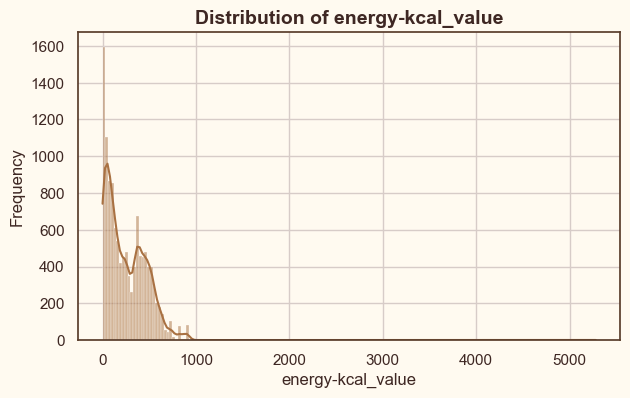

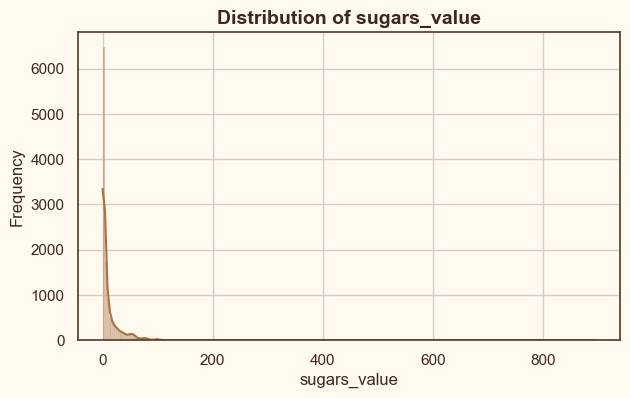

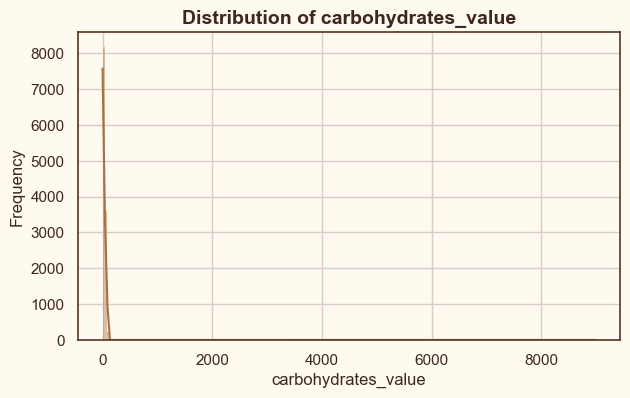

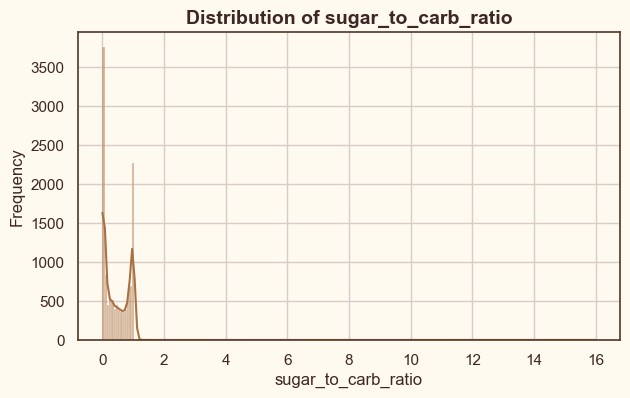

In [42]:
numeric_cols = [
    'energy-kcal_value', 'sugars_value', 'carbohydrates_value', 
    'sugar_to_carb_ratio'
]
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.histplot(df[col], kde=True, color=milk_choco)
        plt.title(f"Distribution of {col}", fontsize=14, color=dark_choco)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

 # --------------------------------------------
# 🧁 3️⃣ Calorie & Sugar Category Distribution
# --------------------------------------------


C:\Users\pabha\AppData\Local\Temp\ipykernel_14496\3371659843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=[cream, milk_choco, dark_choco])


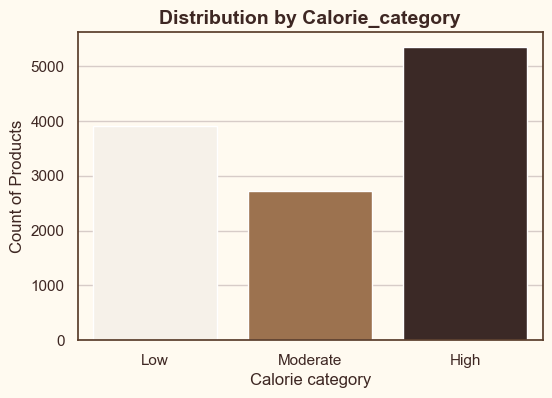

C:\Users\pabha\AppData\Local\Temp\ipykernel_14496\3371659843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=[cream, milk_choco, dark_choco])


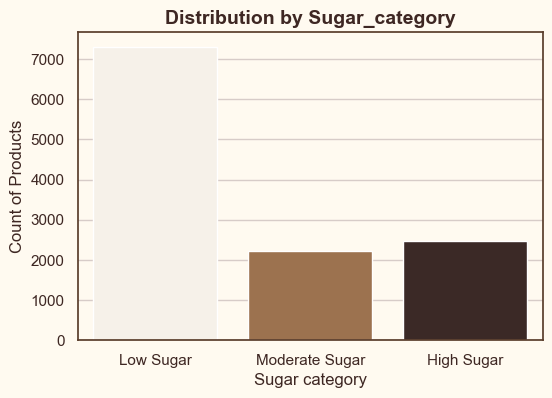

In [35]:
cat_cols = ["calorie_category", "sugar_category"]
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, data=df, palette=[cream, milk_choco, dark_choco])
        plt.title(f"Distribution by {col.capitalize()}", fontsize=14, color=dark_choco)
        plt.xlabel(col.replace("_", " ").capitalize())
        plt.ylabel("Count of Products")
        plt.show()

# --------------------------------------------
# 🍬 4️⃣ NOVA Group Distribution (Processing Level)
# --------------------------------------------

C:\Users\pabha\AppData\Local\Temp\ipykernel_14496\2669262569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\pabha\AppData\Local\Temp\ipykernel_14496\2669262569.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


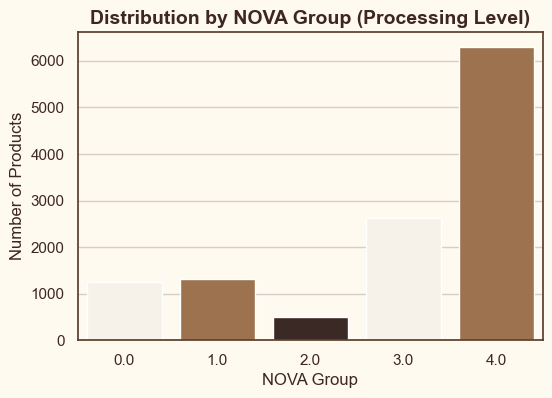

In [44]:
if 'nova-group' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(
        x='nova-group',
        data=df,
        palette=[cream, milk_choco, dark_choco]
    )
    plt.title("Distribution by NOVA Group (Processing Level)", fontsize=14, color=dark_choco)
    plt.xlabel("NOVA Group")
    plt.ylabel("Number of Products")
    plt.show()

# ---------------------------------------------------------------
# 🍩 5️⃣ Ultra-Processed vs Non-Processed
# ---------------------------------------------------------------

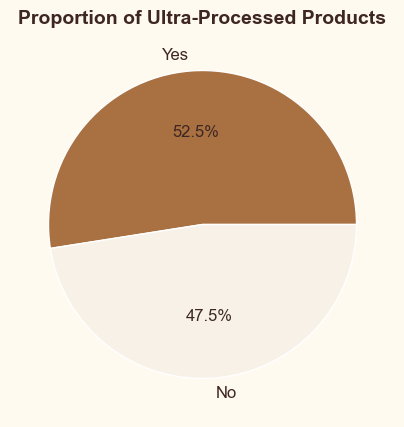

In [45]:
if 'is_ultra_processed' in df.columns:
    plt.figure(figsize=(5,5))
    df['is_ultra_processed'].value_counts().plot.pie(
        autopct='%1.1f%%',
        colors=[milk_choco, cream],
        textprops={'color': dark_choco, 'fontsize': 12}
    )
    plt.title("Proportion of Ultra-Processed Products", fontsize=14, color=dark_choco)
    plt.ylabel("")
    plt.show()


# ---------------------------------------------------------------
# 🍫 6️⃣ Calories vs Sugars — Scatter Plot
# --------------------------------------------------------------

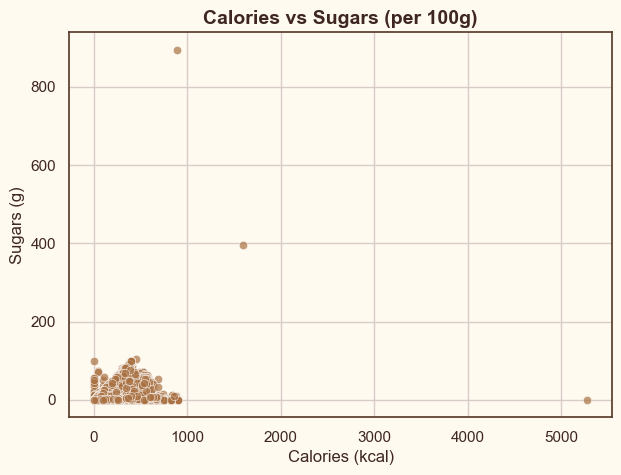

In [46]:
if 'energy-kcal_value' in df.columns and 'sugars_value' in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(
        data=df,
        x='energy-kcal_value',
        y='sugars_value',
        color=milk_choco,
        alpha=0.7
    )
    plt.title("Calories vs Sugars (per 100g)", fontsize=14, color=dark_choco)
    plt.xlabel("Calories (kcal)")
    plt.ylabel("Sugars (g)")
    plt.show()

In [ ]:
# ---------------------------------------------------------------
# 🍪 7️⃣ Correlation Heatmap
# ---------------------------------------------------------------


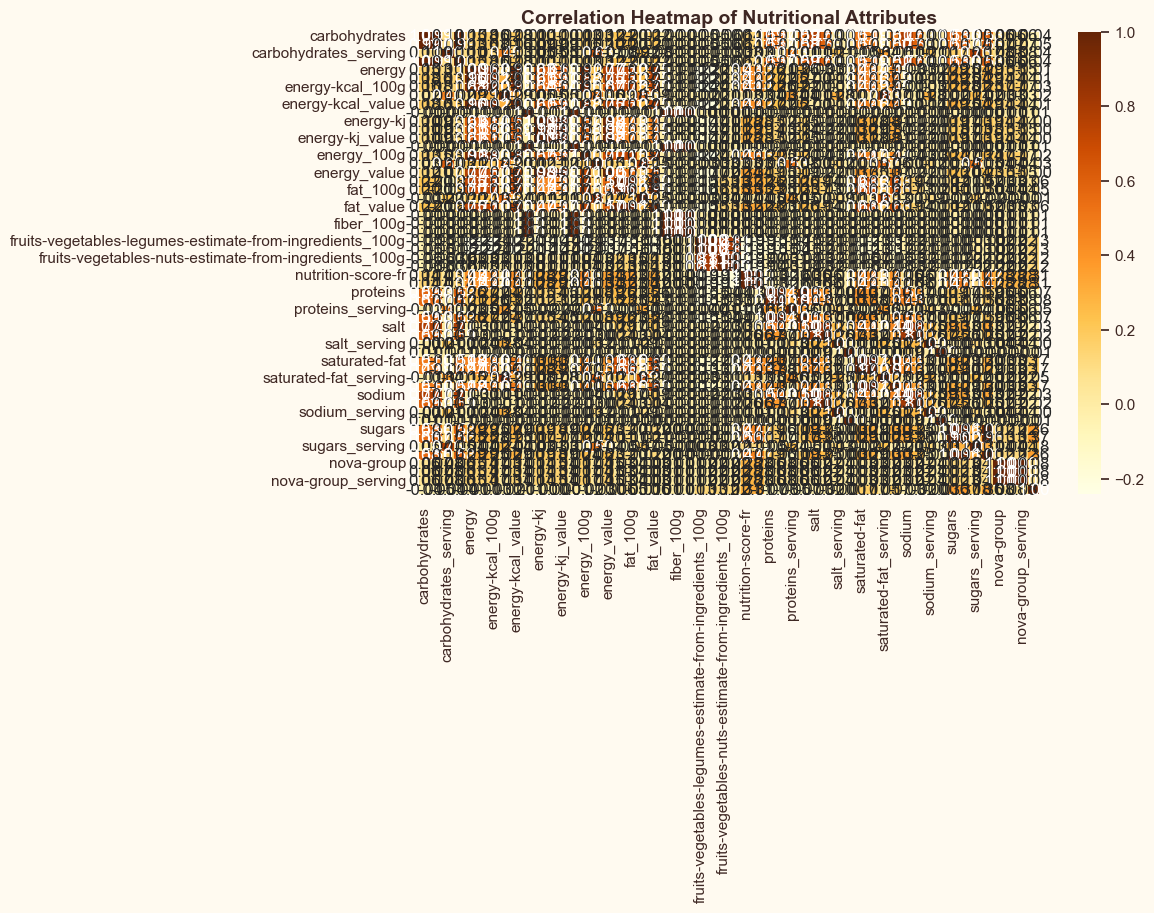

In [47]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap="YlOrBr", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Nutritional Attributes", fontsize=14, color=dark_choco)
plt.show()

# ---------------------------------------------------------------
# 🍯 8️⃣ Top 10 Brands by Average Calories
# ---------------------------------------------------------------

C:\Users\pabha\AppData\Local\Temp\ipykernel_14496\1465307804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_calories.values, y=brand_calories.index, palette=[milk_choco, dark_choco])
C:\Users\pabha\AppData\Local\Temp\ipykernel_14496\1465307804.py:4: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=brand_calories.values, y=brand_calories.index, palette=[milk_choco, dark_choco])


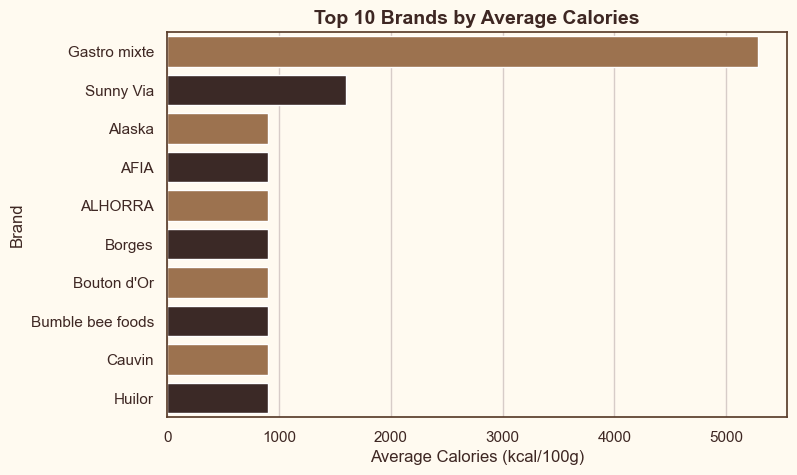

In [48]:
if 'brand' in df.columns and 'energy-kcal_value' in df.columns:
    brand_calories = df.groupby('brand')['energy-kcal_value'].mean().nlargest(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=brand_calories.values, y=brand_calories.index, palette=[milk_choco, dark_choco])
    plt.title("Top 10 Brands by Average Calories", fontsize=14, color=dark_choco)
    plt.xlabel("Average Calories (kcal/100g)")
    plt.ylabel("Brand")
    plt.show()


🟦 Cell 7: Reflection Note

# ---------------------------------------------------------------
# 💡 Note for Learners
# ---------------------------------------------------------------


In [52]:
from IPython.display import Markdown, display

display(Markdown("""
💡 **Note:**  
Learners are encouraged to explore the data creatively — uncover patterns, spot outliers,  
and share any interesting findings or questions that emerge from their analysis. 🍫📊
"""))


💡 **Note:**  
Learners are encouraged to explore the data creatively — uncover patterns, spot outliers,  
and share any interesting findings or questions that emerge from their analysis. 🍫📊


🟦 Cell 8: Insights & Findings (Numeric Summary)

# ---------------------------------------------------------------
# 🧾 Step 5: Insights & Findings (Quantitative Summary)
# ---------------------------------------------------------------


In [53]:
avg_calories = df["energy-kcal_100g"].mean()
avg_sugar = df["sugars_100g"].mean()
avg_fat = df["fat_100g"].mean()
calorie_dist = df["calorie_category"].value_counts(normalize=True) * 100
nova_dist = df["nova-group"].value_counts(normalize=True) * 100
ultra_processed_pct = nova_dist.get(4, 0)
high_sugar_ratio = df[df["sugar_to_carb_ratio"] > 0.7].shape[0] / len(df) * 100

print(f"🍫 Avg Calories: {avg_calories:.1f}")
print(f"🍭 Avg Sugar: {avg_sugar:.1f}")
print(f"🥥 Avg Fat: {avg_fat:.1f}")
print("\nCalorie Distribution (%):")
print(calorie_dist.round(2))
print("\nNOVA Group (%):")
print(nova_dist.round(2))
print(f"\n⚠️ Ultra-processed: {ultra_processed_pct:.1f}%")
print(f"🍬 High sugar-to-carb ratio (>0.7): {high_sugar_ratio:.1f}%")


🍫 Avg Calories: 270.5
🍭 Avg Sugar: 11.0
🥥 Avg Fat: 14.2

Calorie Distribution (%):
calorie_category
High        44.62
Low         32.64
Moderate    22.74
Name: proportion, dtype: float64

NOVA Group (%):
nova-group
4.0    52.48
3.0    21.96
1.0    11.02
0.0    10.46
2.0     4.08
Name: proportion, dtype: float64

⚠️ Ultra-processed: 52.5%
🍬 High sugar-to-carb ratio (>0.7): 34.0%


🟦 Cell 9: Insights & Findings (Markdown Summary)

# ---------------------------------------------------------------
# 💬 Step 6: Summary Narrative for Report
# ---------------------------------------------------------------


In [55]:
from IPython.display import Markdown, display

display(Markdown(f"""
### 🍫 **Insights & Findings Summary**

1. **Average Nutrients**
   - Calories: **{avg_calories:.1f} kcal/100g**
   - Sugars: **{avg_sugar:.1f} g/100g**
   - Fat: **{avg_fat:.1f} g/100g**

2. **Calorie Distribution**
   - Most products are in the **{calorie_dist.idxmax()} calorie** category.

3. **Processing Level (NOVA)**
   - About **{ultra_processed_pct:.1f}%** are ultra-processed.

4. **Sugar-to-Carb Insights**
   - **{high_sugar_ratio:.1f}%** have high sugar ratios, meaning most carbs come from sugar.

5. **Health Implication**
   - High sugar + high calorie + high NOVA = ⚠️ Potential nutrition concern.

---
💡 **Next Steps**
- Compare brands & regions for deeper insights.
- Build an **interactive dashboard** (Streamlit or Power BI) to visualize results dynamically.
"""))



### 🍫 **Insights & Findings Summary**

1. **Average Nutrients**
   - Calories: **270.5 kcal/100g**
   - Sugars: **11.0 g/100g**
   - Fat: **14.2 g/100g**

2. **Calorie Distribution**
   - Most products are in the **High calorie** category.

3. **Processing Level (NOVA)**
   - About **52.5%** are ultra-processed.

4. **Sugar-to-Carb Insights**
   - **34.0%** have high sugar ratios, meaning most carbs come from sugar.

5. **Health Implication**
   - High sugar + high calorie + high NOVA = ⚠️ Potential nutrition concern.

---
💡 **Next Steps**
- Compare brands & regions for deeper insights.
- Build an **interactive dashboard** (Streamlit or Power BI) to visualize results dynamically.


🟦 Cell 10: Create SQLite Connection

# ---------------------------------------------------------------
# 🗃️ Step 4a: Establish SQLite Database Connection
# ---------------------------------------------------------------

In [5]:
import sqlite3

# Create database (or connect if exists)
conn = sqlite3.connect("chocolates.db")
cursor = conn.cursor()
print("✅ Database connection established.")

✅ Database connection established.


In [ ]:
🟦 Cell 11: Create Table 

# ---------------------------------------------------------------
# 🗃️ Step 4b: Create table product_info
# ---------------------------------------------------------------


In [6]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS product_info (
    product_code TEXT PRIMARY KEY,
    product_name TEXT,
    brand TEXT
)
""")
conn.commit()
print("✅ Table 'product_info' created.")

✅ Table 'product_info' created.


# ---------------------------------------------------------------
# 🗃️ Step 4c: Create table nutrient_info
# ---------------------------------------------------------------

In [7]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS nutrient_info (
    product_code TEXT,
    energy_kcal_value FLOAT,
    energy_kj_value FLOAT,
    carbohydrates_value FLOAT,
    sugars_value FLOAT,
    fat_value FLOAT,
    saturated_fat_value FLOAT,
    proteins_value FLOAT,
    fiber_value FLOAT,
    salt_value FLOAT,
    sodium_value FLOAT,
    fruits_vegetables_nuts FLOAT,
    nutrition_score_fr INTEGER,
    nova_group INTEGER,
    FOREIGN KEY(product_code) REFERENCES product_info(product_code)
)
""")
conn.commit()
print("✅ Table 'nutrient_info' created.")

✅ Table 'nutrient_info' created.


# ---------------------------------------------------------------
# 🗃️ Step 4d: Create table derived_metrics
# ---------------------------------------------------------------

In [8]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS derived_metrics (
    product_code TEXT,
    sugar_to_carb_ratio FLOAT,
    calorie_category TEXT,
    sugar_category TEXT,
    is_ultra_processed TEXT,
    FOREIGN KEY(product_code) REFERENCES product_info(product_code)
)
""")
conn.commit()
print("✅ Table 'derived_metrics' created.")

✅ Table 'derived_metrics' created.


In [ ]:
🟦 Cell 5: Insert Data into sql Table

# ---------------------------------------------------------------
# 📝 Step 4e: Insert data into product_info
# ---------------------------------------------------------------

In [9]:
for _, row in df.iterrows():
    cursor.execute("""
        INSERT OR IGNORE INTO product_info (product_code, product_name, brand)
        VALUES (?, ?, ?)
    """, (row["product_code"], row["product_name"], row["brand"]))

conn.commit()
print("✅ Data inserted into 'product_info'.")

NameError: name 'df' is not defined

# ---------------------------------------------------------------
# 📝 Step 4f: Insert data into nutrient_info
# ---------------------------------------------------------------

In [ ]:
for _, row in df.iterrows():
    cursor.execute("""
        INSERT OR IGNORE INTO nutrient_info (
            product_code,
            energy_kcal_value,
            energy_kj_value,
            carbohydrates_value,
            sugars_value,
            fat_value,
            saturated_fat_value,
            proteins_value,
            fiber_value,
            salt_value,
            sodium_value,
            fruits_vegetables_nuts,
            nutrition_score_fr,
            nova_group
        )
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (
        row["product_code"],
        row.get("energy-kcal_100g", 0),
        row.get("energy-kj_100g", 0),
        row.get("carbohydrates_100g", 0),
        row.get("sugars_100g", 0),
        row.get("fat_100g", 0),
        row.get("saturated-fat_100g", 0),
        row.get("proteins_100g", 0),
        row.get("fiber_100g", 0),
        row.get("salt_100g", 0),
        row.get("sodium_100g", 0),
        row.get("fruits-vegetables-nuts-estimate-from-ingredients_100g", 0),
        row.get("nutrition-score-fr", None),
        row.get("nova-group", None)
    ))

conn.commit()
print("✅ Data inserted into 'nutrient_info'.")


# ---------------------------------------------------------------
# 📝 Step 4g: Insert data into derived_metrics
# ---------------------------------------------------------------

In [ ]:
for _, row in df.iterrows():
    cursor.execute("""
        INSERT OR IGNORE INTO derived_metrics (
            product_code,
            sugar_to_carb_ratio,
            calorie_category,
            sugar_category,
            is_ultra_processed
        )
        VALUES (?, ?, ?, ?, ?)
    """, (
        row["product_code"],
        row.get("sugar_to_carb_ratio", 0),
        row.get("calorie_category", None),
        row.get("sugar_category", None),
        "Yes" if row.get("is_ultra_processed", False) else "No"
    ))

conn.commit()
print("✅ Data inserted into 'derived_metrics'.")


In [ ]:
🟦 Cell 12: Close Connection

# ---------------------------------------------------------------
# 🔒 Close Database Connection
# ---------------------------------------------------------------

In [ ]:
conn.close()
print("✅ Database connection closed.")

In [ ]:
🟦 Cell 1: Imports & Connect Database

# ---------------------------------------------------------------
# Step 5: SQL Queries
# ---------------------------------------------------------------

In [ ]:
import sqlite3
import pandas as pd

# Connect to your database
conn = sqlite3.connect("chocolates.db")
print("✅ Connected to SQLite database.")


📑 product_info sql Queries

In [ ]:
#queries 1:Count products per brand

In [ ]:
query = """
SELECT brand, COUNT(*) AS product_count
FROM product_info
GROUP BY brand
ORDER BY product_count DESC
"""
df_products_per_brand = pd.read_sql_query(query, conn)
df_products_per_brand.head(10)

In [ ]:
# queries 2: Count unique products per brand

In [ ]:
query = """
SELECT brand, COUNT(DISTINCT product_name) AS unique_products
FROM product_info
GROUP BY brand
ORDER BY unique_products DESC
"""
pd.read_sql_query(query, conn).head(10)

In [ ]:
queries 3 : Top 5 brands by product count


In [ ]:
query = """
SELECT brand, COUNT(*) AS product_count
FROM product_info
GROUP BY brand
ORDER BY product_count DESC
LIMIT 5
"""
pd.read_sql_query(query, conn)

In [ ]:
#query 4.Products with missing product name

In [ ]:
query = """
SELECT *
FROM product_info
WHERE product_name IS NULL OR product_name = ''
"""
pd.read_sql_query(query, conn)

In [ ]:
#query 5.Number of unique brands

In [ ]:
query = "SELECT COUNT(DISTINCT brand) AS unique_brands FROM product_info"
pd.read_sql_query(query, conn)


In [ ]:
# query 6. Products with code starting with '3'

In [ ]:
query = """
SELECT *
FROM product_info
WHERE product_code LIKE '3%'
"""
pd.read_sql_query(query, conn).head(10)

📑 nutrient_info  sql Queries

In [ ]:
# query 7. Top 10 products with highest energy-kcal_value

In [ ]:
query = """
SELECT product_code, energy_kcal_value
FROM nutrient_info
ORDER BY energy_kcal_value DESC
LIMIT 10
"""
pd.read_sql_query(query, conn)

In [ ]:
# query 8. Average sugars_value per nova-group


In [ ]:
query = """
SELECT nova_group, AVG(sugars_value) AS avg_sugars
FROM nutrient_info
GROUP BY nova_group
"""
pd.read_sql_query(query, conn)


In [ ]:
# query 9. Count products with fat_value > 20g

In [ ]:

query = """
SELECT COUNT(*) AS high_fat_products
FROM nutrient_info
WHERE fat_value > 20
"""
pd.read_sql_query(query, conn)















In [ ]:
# query 10.  Average carbohydrates_value per product

In [ ]:
query = """
SELECT AVG(carbohydrates_value) AS avg_carbohydrates
FROM nutrient_info
"""
pd.read_sql_query(query, conn)

In [ ]:
# query 11. Products with sodium_value > 1g

In [ ]:

query = """
SELECT product_code, sodium_value
FROM nutrient_info
WHERE sodium_value > 1
"""
pd.read_sql_query(query, conn).head(10)

In [ ]:
# query 12. Count products with non-zero fruits-vegetables-nuts

In [ ]:

query = """
SELECT COUNT(*) AS products_with_fvn
FROM nutrient_info
WHERE fruits_vegetables_nuts > 0
"""
pd.read_sql_query(query, conn)


In [ ]:
# query 13. Products with energy-kcal_value > 500


In [ ]:
query = """
SELECT product_code, energy_kcal_value
FROM nutrient_info
WHERE energy_kcal_value > 500
"""
pd.read_sql_query(query, conn).head(10)


📑 derived_metrics Queries

In [ ]:
# query 14. Count products per calorie_category

In [ ]:
query = """
SELECT calorie_category, COUNT(*) AS count_products
FROM derived_metrics
GROUP BY calorie_category
"""
pd.read_sql_query(query, conn)

In [ ]:
#query 15. Count of High Sugar products

In [ ]:
query = """
SELECT COUNT(*) AS high_sugar_count
FROM derived_metrics
WHERE sugar_category = 'High Sugar'
"""
pd.read_sql_query(query, conn)

In [ ]:
# query 16.Average sugar_to_carb_ratio for High Calorie products

In [ ]:
query = """
SELECT AVG(sugar_to_carb_ratio) AS avg_ratio
FROM derived_metrics
WHERE calorie_category = 'High'
"""
pd.read_sql_query(query, conn)

In [ ]:
# query 17. Products both High Calorie & High Sugar

In [ ]:
query = """
SELECT product_code, calorie_category, sugar_category
FROM derived_metrics
WHERE calorie_category = 'High' AND sugar_category = 'High Sugar'
"""
pd.read_sql_query(query, conn).head(10)


In [ ]:
# query 18. Number of products marked as ultra-processed

In [ ]:
query = """
SELECT COUNT(*) AS ultra_processed_count
FROM derived_metrics
WHERE is_ultra_processed = 'Yes'
"""
pd.read_sql_query(query, conn)


In [ ]:
# query 19.  Products with sugar_to_carb_ratio > 0.7
 

In [ ]:
query = """
SELECT product_code, sugar_to_carb_ratio
FROM derived_metrics
WHERE sugar_to_carb_ratio > 0.7
"""
pd.read_sql_query(query, conn).head(10)

In [ ]:
#query 20. Average sugar_to_carb_ratio per calorie_category

In [ ]:
query = """
SELECT calorie_category, AVG(sugar_to_carb_ratio) AS avg_ratio
FROM derived_metrics
GROUP BY calorie_category
"""
pd.read_sql_query(query, conn)

📑 Join Queries

In [ ]:
# query 21. Top 5 brands with most High Calorie products

In [ ]:
query = """
SELECT p.brand, COUNT(*) AS high_cal_count
FROM derived_metrics d
JOIN product_info p ON d.product_code = p.product_code
WHERE d.calorie_category = 'High'
GROUP BY p.brand
ORDER BY high_cal_count DESC
LIMIT 5
"""
pd.read_sql_query(query, conn)


In [ ]:
#query 22. Average energy-kcal_value for each calorie_category

In [ ]:
uery = """
SELECT d.calorie_category, AVG(n.energy_kcal_value) AS avg_energy
FROM derived_metrics d
JOIN nutrient_info n ON d.product_code = n.product_code
GROUP BY d.calorie_category
"""
pd.read_sql_query(query, conn)

In [ ]:
#query 23. Count of ultra-processed products per brand

In [ ]:
query = """
SELECT p.brand, COUNT(*) AS ultra_count
FROM derived_metrics d
JOIN product_info p ON d.product_code = p.product_code
WHERE d.is_ultra_processed = 'Yes'
GROUP BY p.brand
ORDER BY ultra_count DESC
"""
pd.read_sql_query(query, conn).head(10)

In [ ]:
# query 24. Products High Sugar & High Calorie with brand

In [ ]:
query = """
SELECT p.brand, d.product_code, d.calorie_category, d.sugar_category
FROM derived_metrics d
JOIN product_info p ON d.product_code = p.product_code
WHERE d.calorie_category = 'High' AND d.sugar_category = 'High Sugar'
"""
pd.read_sql_query(query, conn).head(10)

In [ ]:
# query 25. Average sugar content per brand for ultra-processed products

In [ ]:
query = """
SELECT p.brand, AVG(n.sugars_value) AS avg_sugar
FROM derived_metrics d
JOIN product_info p ON d.product_code = p.product_code
JOIN nutrient_info n ON d.product_code = n.product_code
WHERE d.is_ultra_processed = 'Yes'
GROUP BY p.brand
ORDER BY avg_sugar DESC
"""
pd.read_sql_query(query, conn).head(10)

In [ ]:
#query 26. Number of products with fruits/vegetables/nuts in each calorie_category

In [ ]:
query = """
SELECT d.calorie_category, COUNT(*) AS count_fvn
FROM derived_metrics d
JOIN nutrient_info n ON d.product_code = n.product_code
WHERE n.fruits_vegetables_nuts > 0
GROUP BY d.calorie_category
"""
pd.read_sql_query(query, conn)


In [95]:
#query 27. products by sugar_to_carb_ratio with calorie and sugar category

In [ ]:
query = """
SELECT d.product_code, d.sugar_to_carb_ratio, d.calorie_category, d.sugar_category
FROM derived_metrics d
ORDER BY d.sugar_to_carb_ratio DESC
LIMIT 5
"""
pd.read_sql_query(query, conn)


Close Database Connection

In [ ]:
conn.close()
print("✅ Database connection closed.")

# -----------------------------------------------------------
# 🧾 Step 7: Project Presentation & Insights
# -----------------------------------------------------------

,Step,Description
0,Data Extraction,"Fetched ~12,000 chocolate records via OpenFood..."
1,Data Cleaning,"Handled missing values, dropped columns >50% n..."
2,Feature Engineering,"Derived sugar_to_carb_ratio, calorie_category,..."
3,SQL Table Creation,"Created 3 tables: product_info, nutrient_info,..."
4,EDA,"Explored distributions of calories, sugars, su..."
5,Visual Insights,Visualizations in Python/Streamlit or Power BI...



Top 5 brands with most High Calorie products:


,brand,high_cal_count
0,Unknown,120
1,Hacendado,118
2,Tesco,91
3,Carrefour,88
4,Bjorg,61


C:\Users\pabha\AppData\Local\Temp\ipykernel_11084\3426121393.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='calorie_category', y='count', data=df_calories, palette="Set2")


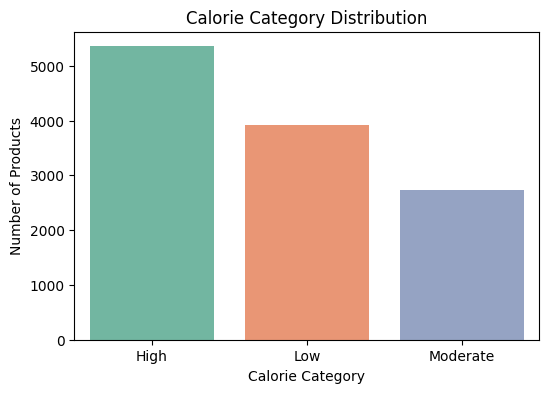

C:\Users\pabha\AppData\Local\Temp\ipykernel_11084\3426121393.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nova_group', y='count', data=df_nova, palette="Set3")


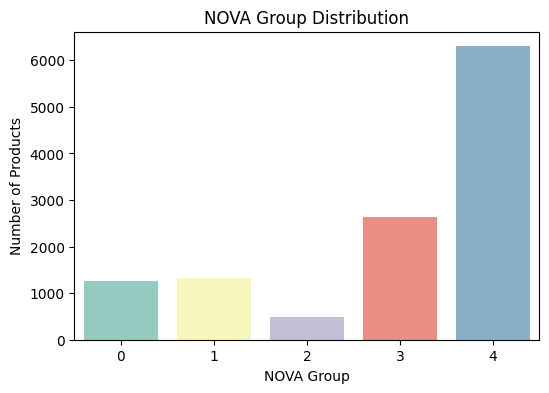

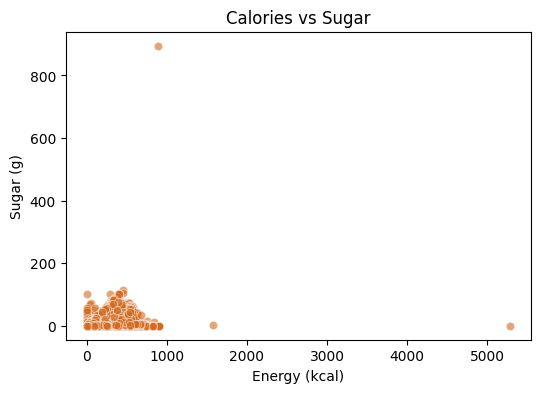

C:\Users\pabha\AppData\Local\Temp\ipykernel_11084\3426121393.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='calorie_category', y='sugar_to_carb_ratio', data=df_box, palette="Set3")


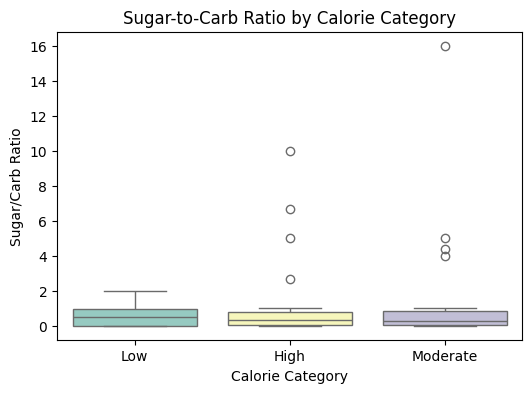


✅ Recommendations:
- Limit consumption of brands/products with high sugar & calories
- Promote low/moderate calorie and low sugar chocolates
- Educate consumers about ultra-processed vs minimally processed chocolates
- Use dashboards (Python/Power BI/Streamlit) to guide healthier choices


In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

st = None  # placeholder if using Streamlit later

# Connect to SQLite database
conn = sqlite3.connect("chocolates.db")

# -------------------------------
# 1️⃣ Summary Tables
# -------------------------------
workflow_summary = pd.DataFrame({
    "Step": [
        "Data Extraction",
        "Data Cleaning",
        "Feature Engineering",
        "SQL Table Creation",
        "EDA",
        "Visual Insights"
    ],
    "Description": [
        "Fetched ~12,000 chocolate records via OpenFoodFacts API",
        "Handled missing values, dropped columns >50% nulls, imputed numeric columns",
        "Derived sugar_to_carb_ratio, calorie_category, sugar_category, is_ultra_processed",
        "Created 3 tables: product_info, nutrient_info, derived_metrics; product_code as PK/FK",
        "Explored distributions of calories, sugars, sugar_to_carb_ratio, NOVA group, ultra-processed products",
        "Visualizations in Python/Streamlit or Power BI: bar charts, pie charts, scatter plots, box plots"
    ]
})
display(workflow_summary)

# -------------------------------
# 2️⃣ Key Insights
# -------------------------------
# Example queries to highlight insights
# Top 5 brands by high calorie products
query_top_brands = """
SELECT p.brand, COUNT(*) AS high_cal_count
FROM derived_metrics d
JOIN product_info p ON d.product_code = p.product_code
WHERE d.calorie_category = 'High'
GROUP BY p.brand
ORDER BY high_cal_count DESC
LIMIT 5
"""
top_brands = pd.read_sql_query(query_top_brands, conn)
print("\nTop 5 brands with most High Calorie products:")
display(top_brands)

# Sugar-to-carb ratio distribution
df_ratio = pd.read_sql_query("""
SELECT sugar_to_carb_ratio FROM derived_metrics
WHERE sugar_to_carb_ratio IS NOT NULL
""", conn)

# -------------------------------
# 3️⃣ Visualizations
# -------------------------------
# 3a. Calorie Category Distribution
df_calories = pd.read_sql_query("""
SELECT calorie_category, COUNT(*) AS count FROM derived_metrics
GROUP BY calorie_category
""", conn)

plt.figure(figsize=(6,4))
sns.barplot(x='calorie_category', y='count', data=df_calories, palette="Set2")
plt.title("Calorie Category Distribution")
plt.ylabel("Number of Products")
plt.xlabel("Calorie Category")
plt.show()

# 3b. NOVA Group Distribution
df_nova = pd.read_sql_query("""
SELECT nova_group, COUNT(*) AS count FROM nutrient_info
GROUP BY nova_group
""", conn)

plt.figure(figsize=(6,4))
sns.barplot(x='nova_group', y='count', data=df_nova, palette="Set3")
plt.title("NOVA Group Distribution")
plt.ylabel("Number of Products")
plt.xlabel("NOVA Group")
plt.show()

# 3c. Scatter Plot: Calories vs Sugar
df_scatter = pd.read_sql_query("""
SELECT energy_kcal_value, sugars_value FROM nutrient_info
WHERE energy_kcal_value IS NOT NULL AND sugars_value IS NOT NULL
""", conn)

plt.figure(figsize=(6,4))
sns.scatterplot(x='energy_kcal_value', y='sugars_value', data=df_scatter, color='chocolate', alpha=0.6)
plt.title("Calories vs Sugar")
plt.xlabel("Energy (kcal)")
plt.ylabel("Sugar (g)")
plt.show()

# 3d. Sugar-to-Carb Ratio by Calorie Category
df_box = pd.read_sql_query("""
SELECT calorie_category, sugar_to_carb_ratio FROM derived_metrics
WHERE sugar_to_carb_ratio IS NOT NULL
""", conn)

plt.figure(figsize=(6,4))
sns.boxplot(x='calorie_category', y='sugar_to_carb_ratio', data=df_box, palette="Set3")
plt.title("Sugar-to-Carb Ratio by Calorie Category")
plt.xlabel("Calorie Category")
plt.ylabel("Sugar/Carb Ratio")
plt.show()

# -------------------------------
# 4️⃣ Recommendations (Summary)
# -------------------------------
recommendations = [
    "Limit consumption of brands/products with high sugar & calories",
    "Promote low/moderate calorie and low sugar chocolates",
    "Educate consumers about ultra-processed vs minimally processed chocolates",
    "Use dashboards (Python/Power BI/Streamlit) to guide healthier choices"
]

print("\n✅ Recommendations:")
for r in recommendations:
    print(f"- {r}")

# Close DB connection
conn.close()